# Diabetes Calculator

The diabetes calculator project aims to develop a classification tool utilizing Support Vector Machine (SVM)  to assess the risk  of diabetes in individuals. The calculator will consider various factors to predict the likelihood of developing diabetes in indivuals.

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score

# Data Extraction

In [2]:
df = pd.read_csv('diabetes.csv')

Features of the datset:
1. Glucose - Blood glucose level
2. BloodPressure - Pressure in the blood
3. Insulin - Blood Insulin level
4. BMI - Body mass Index
5. DiabetesPedigreeFunction - diabetes likelihood depending on the person's age and diabetic family history
6. Age - Age of the indivual

Outcome - Since it is a Binary classification, the outcome is spilt into boolean as 0 and 1.                                 
0 represent the observation has showed negative result which proves the indivual is not diabetic.                           
1 represent the observation has showed positive result which proves the indivual is diabetic.

# Data Analysis

In [5]:
df.head()

Glucose  BloodPressure  Insulin   BMI  DiabetesPedigreeFunction  Age  \
0      148             72        0  33.6                     0.627   50   
1       85             66        0  26.6                     0.351   31   
2      183             64        0  23.3                     0.672   32   
3       89             66       94  28.1                     0.167   21   
4      137             40      168  43.1                     2.288   33   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1

Checking the head of the dataset

In [6]:
df.isnull()

Glucose  BloodPressure  Insulin    BMI  DiabetesPedigreeFunction    Age  \
0      False          False    False  False                     False  False   
1      False          False    False  False                     False  False   
2      False          False    False  False                     False  False   
3      False          False    False  False                     False  False   
4      False          False    False  False                     False  False   
..       ...            ...      ...    ...                       ...    ...   
763    False          False    False  False                     False  False   
764    False          False    False  False                     False  False   
765    False          False    False  False                     False  False   
766    False          False    False  False                     False  False   
767    False          False    False  False                     False  False   

     Outcome  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
763    False  
764    False  
765    False  
766    False  
767    False  

[768 rows x 7 columns]

Checking for the null values

<AxesSubplot:>

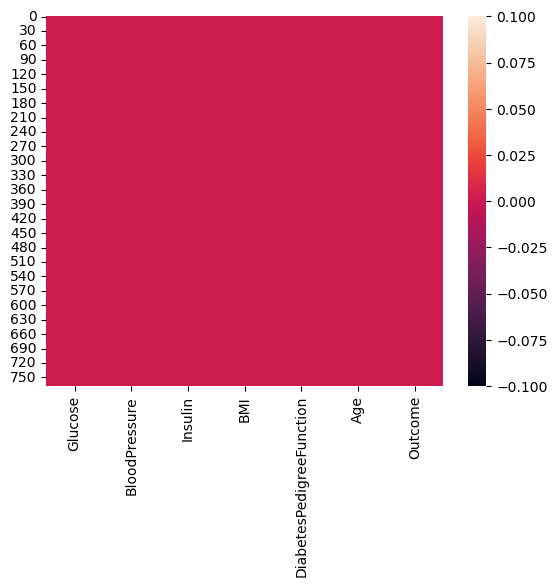

In [7]:
sns.heatmap(df.isnull())

No null values observed from the heatmap

# Data Standardization

Data Standardization is used to convert the data to a standard format so that the mean and standard deviation of the features would become zero.

In [8]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

    X is the variable which contains all the features of the dataset (independent variable).                                      y is the variable which is the label or outcome (dependent variable).

In [9]:
scaler = StandardScaler()

Calling the StandardScaler function

In [10]:
scaler.fit(X)

StandardScaler()

Fitting the input features in the Scaler model

In [11]:
Std_X = scaler.transform(X)

Transforming X to the standard form

In [12]:
Std_X

array([[ 0.84832379,  0.14964075, -0.69289057,  0.20401277,  0.46849198,
         1.4259954 ],
       [-1.12339636, -0.16054575, -0.69289057, -0.68442195, -0.36506078,
        -0.19067191],
       [ 1.94372388, -0.26394125, -0.69289057, -1.10325546,  0.60439732,
        -0.10558415],
       ...,
       [ 0.00330087,  0.14964075,  0.27959377, -0.73518964, -0.68519336,
        -0.27575966],
       [ 0.1597866 , -0.47073225, -0.69289057, -0.24020459, -0.37110101,
         1.17073215],
       [-0.8730192 ,  0.04624525, -0.69289057, -0.20212881, -0.47378505,
        -0.87137393]])

Transformed data is stored in the form of numpy array.

# SVM Model Training

In [13]:
classifier = svm.SVC(kernel='linear')

Creating Model called classifier with SVM with linear kernel

In [14]:
X_train, X_test, y_train, y_test = train_test_split(Std_X, y, test_size=0.3, random_state=101)

Spilting the data into training and test data

In [15]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

Fitting the training data into the model

In [16]:
predictions = classifier.predict(X_test)

Making predictions for the testing data

In [17]:
print(confusion_matrix(predictions,y_test))

[[136  33]
 [ 14  48]]


Confusion matrix shows about 80 percent of the data have been predicted as true positive and true negative.

In [18]:
print(accuracy_score(predictions,y_test))

0.7965367965367965


Checking the accuracy

# Predicting for 1 person

In [19]:
a = input("Glucose level")

Glucose level148


In [20]:
b = input("Blood Pressure")

Blood Pressure72


In [21]:
c = input("Insulin")

Insulin0


In [22]:
d = input("BMI")

BMI33


In [23]:
e = input("DPF")

DPF0.7


In [24]:
f = input("Age")

Age50


In [25]:
person_x = (a,b,c,d,e,f)

In [26]:
np_arr_x = np.array(person_x)

In [27]:
np_arr_reshaped = np_arr_x.reshape(1,-1)

In [28]:
std_data_x = scaler.transform(np_arr_reshaped)

C:\Users\bragh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
std_data_x

array([[ 0.84832379,  0.14964075, -0.69289057,  0.12786122,  0.68896064,
         1.4259954 ]])

In [30]:
prediction_x = classifier.predict(std_data_x)

In [31]:
prediction_x

array([1], dtype=int64)

In [32]:
output = prediction_x[0]

In [34]:
if output==1:
    print("You have Diabetes")
else:
    print("You doesn't have Diabetes")

You have Diabetes
